In [1]:
import pandas as pd
import numpy as np
ColumnNames=['CIBIL','AGE', 'SALARY', 'APPROVE_LOAN']
DataValues=[[480, 28, 610000, 'Yes'],
             [480, 42, 140000, 'No'],
             [480, 29, 420000, 'No'],
             [490, 30, 420000, 'No'],
             [500, 27, 420000, 'No'],
             [510, 34, 190000, 'No'],
             [550, 24, 330000, 'Yes'],
             [560, 34, 160000, 'Yes'],
             [560, 25, 300000, 'Yes'],
             [570, 34, 450000, 'Yes'],
             [590, 30, 140000, 'Yes'],
             [600, 33, 600000, 'Yes'],
             [600, 22, 400000, 'Yes'],
             [600, 25, 490000, 'Yes'],
             [610, 32, 120000, 'Yes'],
             [630, 29, 360000, 'Yes'],
             [630, 30, 480000, 'Yes'],
             [660, 29, 460000, 'Yes'],
             [700, 32, 470000, 'Yes'],
             [740, 28, 400000, 'Yes']]
 
#Create the Data Frame
LoanData=pd.DataFrame(data=DataValues,columns=ColumnNames)
LoanData.head()
 
#Separate Target Variable and Predictor Variables
TargetVariable='APPROVE_LOAN'
Predictors=['CIBIL','AGE', 'SALARY']
X=LoanData[Predictors].values
y=LoanData[TargetVariable].values
 
#Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
import pandas as pd
from sklearn import tree
 
#choose from different tunable hyper parameters
clf = tree.DecisionTreeClassifier(max_depth=3,criterion='entropy')
 
#Printing all the parameters of Decision Trees
print(clf)

DecisionTreeClassifier(criterion='entropy', max_depth=3)


In [11]:
DTree=clf.fit(X_train,y_train)
prediction=DTree.predict(X_test)


In [12]:
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

              precision    recall  f1-score   support

          No       0.50      1.00      0.67         1
         Yes       1.00      0.67      0.80         3

    accuracy                           0.75         4
   macro avg       0.75      0.83      0.73         4
weighted avg       0.88      0.75      0.77         4

[[1 0]
 [1 2]]


<Axes: >

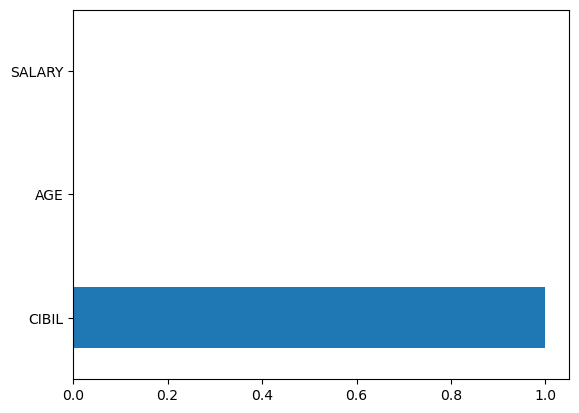

In [13]:
%matplotlib inline
feature_importances = pd.Series(DTree.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

In [14]:
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults['TargetColumn']=y_test
TestingDataResults['Prediction']=prediction
TestingDataResults.head()

CIBIL  AGE  SALARY TargetColumn Prediction
0    480   28  610000          Yes         No
1    660   29  460000          Yes        Yes
2    630   29  360000          Yes        Yes
3    480   42  140000           No         No